# Benchmark C1.2: Coupled problems - Water uptake by a static root system
by Daniel Leitner, Andrea Schnepf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from van_genuchten import *

## Theory

We couple the soil and root water movement (see benchmarks M2, and M3 respectively). The coupling method is not predetermined and in application the choice is dependent on the spatial and temporal scale of the model.

We predescribe a potential transpiration by a Neumann boundary condition. If the resulting matric potential within the root collar is below the wilting point (a critical root water pressure), we set the critical root water pressure as Dirichlet boundary condition, and consider the system as 'stressed'. In this case the actual transpiration (volmetric water flux out of the root collar) differs from the potential transpiration.

## Description of benchmark C1.2

The benchmark analyses dynamic root water uptake from a drying soil by a static root system architecture (Schnepf et al. 2020). We chose a scenario, that starts with an initially dry soil that becomes even drier as water is taken up by the roots, to challenge the different simulators as in this case, soil water pressure head gradients can be expected. Potential water transpiration is given by a sinusoidal function which reaches its maximal transpiration at noon and no transpiration at midnight. In this scenario we are interested in comparing actual transpiration and cumulative uptake over time, especially the times of stress onset. 

The way in which soil and root problems are coupled is not predefined and may be different between the simulators. Classical sink terms are based on the pressure gradient between xylem and the pressure of the corresponding soil control element. Other methods resolve the rhizosphere in more detail to estimate the soil water pressure head at the soil-root interface more accurately. In dry soil this can make a substential difference. 

### Soil parameters

We will use soil types from M2, domain size is 8x8x15 cm$^3$ and initial total potential of -659.8 cm. At the boundaries of the soil domain we set no-flux boundary conditions.

### Root parameters

Root grid is located in the sub-folder 'root_grid/' in RSML, dgf, and RootSys format. It is smaller than that of M3, because the reference solution, i.e. the explicit 3d-simulation, uses a very high resolution mesh and therefore computation time is limiting bigger meshes. 

The root conductivities are chosen the same way as in M3.2a, and M3.2b. The two conductivity scenarios are referred to as C1.2a and C1.2b in the coupled benchmark.  

Potential transpiration is described by a sinusoidal, mean daily transpiration is 6.4 cm$^3$/day (i.e. 12.8 cm$^3$/day maximum at noon, and 0 cm$^3$/day midnight). The critical root water pressure head is -15.290 cm.


## Reference solution

The reference solution was described by Schnepf et al. (2020) and is itself a numerical solution of the explicit 3d-simulation with a high resolution mesh of the soil domain (excluding the roots) that is refined near the root-soil boundary.

In [8]:
def sinusoidal(t): # to calculate potential transpiration
    return np.sin(2. * np.pi * np.array(t) - 0.5 * np.pi) + 1.

def plot_reference(path):
    fig, ax = plt.subplots(1, 1, figsize=(14, 7))
    data = np.loadtxt(path +"reference.csv", delimiter=';')  
    print(data.shape)
    t_a=data[0,:] 
    y_a=data[1,:] 
    cumy_a = integrate.cumtrapz(data[1,:],data[0,:],initial=0)
    ax.plot(t_a, 6.4*sinusoidal(t_a), 'k', label = "potential transpiration")
    ax.plot(t_a,y_a,'r*', label = "actual transpiration")
    ax.set_xlabel("time (day)")
    ax.set_ylabel("transpiration (cm$^3$ day$^{-1}$)")
    ax.legend(loc = 'center right')
    ax2 = ax.twinx()
    ax2.plot(t_a,integrate.cumtrapz(y_a,t_a,initial=0),'r:')
    ax2.set_ylabel("cumulative uptake (cm$^3$)")

(2, 217)


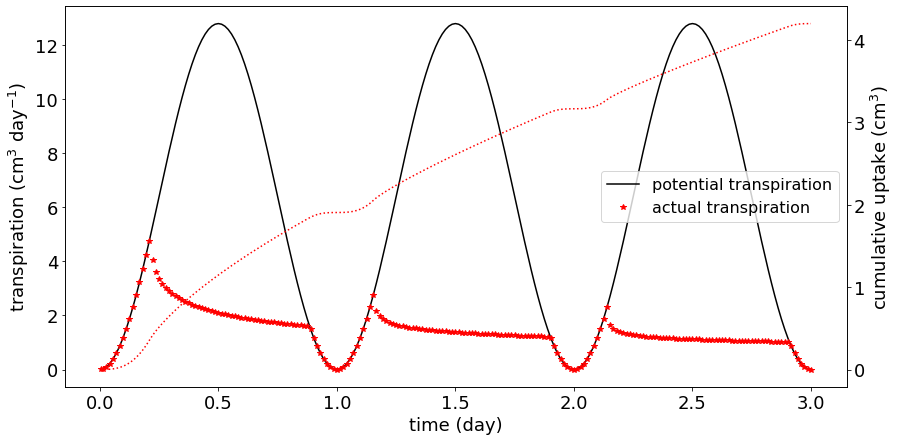

In [9]:
plot_reference("C1.2a Numerical results/")

(2, 217)


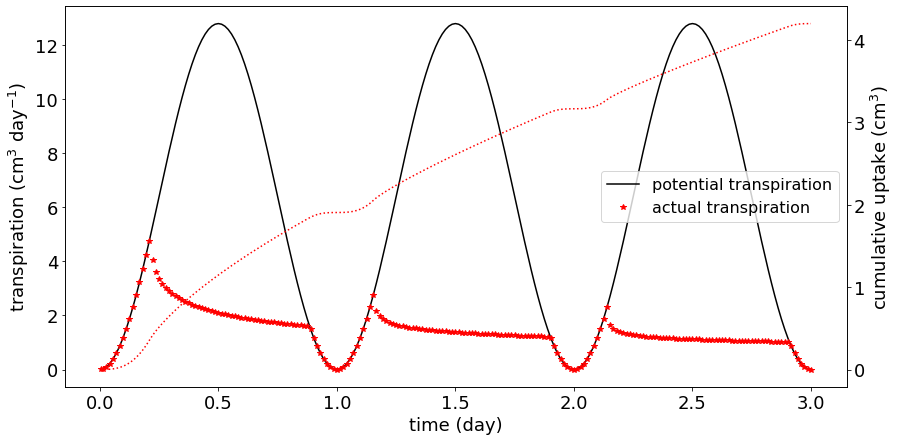

In [10]:
plot_reference("C1.2b Numerical results/") 

Actual transpiration is nearly identical for C1.2a and c1.2b. The reason for this is that uptake is solely restricted by low soil conductivity (see Schepf et al. 2020).

## References

Schnepf, A., Black, C.K., Couvreur, V., Delory, B.M., Doussan, C., Koch, A., Koch, T. et al. (2020) Call for participation: collaborative benchmarking of functional-structural root architecture models. The case of root water uptake. *Frontiers in Plant Science* 11, 316.